# Laboratorio 6

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import advertools as adv
import re, time, emojis, nltk
from IPython.display import Image, display, Markdown
from wordcloud import WordCloud
from collections import namedtuple, Counter
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('wordnet')
spanish_stop_words = stopwords.words('spanish')
pd.set_option('display.max_colwidth', 140)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\osjom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\osjom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
!pip install emojis

In [14]:
def get_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

In [15]:
def clean_tweets(tweet):
    """ 
    removemos handles @user, links https, numeros,
    pasamos a minuscula, removemos numeros, partimos texto,
    eliminamos espacios innecesarios y volvemos a unir texto 

    @return texto limpio
    """
    url_regex = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
    #all_emoji_regex = re.compile(multi_codepoint_emoji_joined + '|' +  r'[' + single_codepoint_emoji_raw + r']')
    del_amp = BeautifulSoup(tweet, 'lxml')
    del_amp_text = del_amp.get_text()
    user_removed = re.sub(r'@[A-Za-z0-9]+','',del_amp_text)
    link_removed = re.sub(url_regex,'',user_removed)
    number_removed = re.sub(r'\d+', '', link_removed)
    hashtag_removed = re.sub('#','', number_removed)
    #emoticons_removed = re.sub(all_emoji_regex, '',hashtag_removed)
    lower_case = hashtag_removed.lower()
    tok = WordPunctTokenizer()
    words = tok.tokenize(lower_case)
    token_tweet = (' '.join(words)).strip()
    clean_tweet = ' '.join([word for word in token_tweet.split() if word not in spanish_stop_words])
    return token_tweet

In [16]:
def lemmatize_tweet(tweet):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tweet.split()]
    lemmatized_tweet = ' '.join(lemmatized_words)
    return lemmatized_tweet

## Problema 1

Primero leemos el dataset y nos quedamos uniccamente con las columnas que nos interesan para este problema.

In [38]:
df_trafico = pd.read_csv('traficogt.csv', index_col=0, parse_dates=['date'])
df_trafico = df_trafico[['id', 'date', 'rawContent', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount']]
df_trafico.head()

,id,date,rawContent,replyCount,retweetCount,likeCount,quoteCount
0,1701654244858679742,2023-09-12 17:49:21+00:00,"#AHORA Amílcar Montejo, director de Comunicación de Emetra, informó que, tras colisión en la calzada Roosevelt y 16 avenida de la zona 1...",1,2,8,0
1,1701651855212691764,2023-09-12 17:39:52+00:00,"CONDUCTORA QUE SE NEGÓ A MOVILIZAR VEHÍCULO ES MULTADA \r\n\r\n📍Calzada Roosevelt 16 avenida zona 11\r\n\r\nTras colisión, se negó a qui...",149,78,524,49
2,1701348453916311903,2023-09-11 21:34:15+00:00,Camión de arena volteado en el viaducto el pulté hacia hacienda real. Boulevares Acatan y la Montaña colapsados #transitogt #traficogt @...,2,1,4,0
3,1701995859229958189,2023-09-13 16:26:49+00:00,"Paciente de 39 años, dolor lumbar de 1 año tras caída.\r\n\r\nHizo 45 sesiones de fisio SIN mejoría. Sugirieron cirugía.\r\n\r\nAcudió p...",3,17,95,0
4,1701216420997017888,2023-09-11 12:49:36+00:00,"#AHORA Amílcar Montejo, director de Comunicación de Emetra, informa que un vehículo quedó atravesado en la vía pública, bloqueando un ca...",0,0,20,0


### Limpieza de Datos

In [39]:
df_trafico['year'] = df_trafico['date'].dt.year
df_trafico['month'] = df_trafico['date'].dt.month
df_trafico['day'] = df_trafico['date'].dt.day
df_trafico['hour'] = df_trafico['date'].dt.hour
df_trafico['date'] = pd.to_datetime(df_trafico['date'].dt.date)

In [40]:
df_trafico = df_trafico[df_trafico.year == 2023]

In [42]:
df_trafico['clean_text'] = df_trafico['rawContent'].apply(clean_tweets)
df_trafico['clean_text'] = df_trafico['clean_text'].apply(lemmatize_tweet)

C:\Users\osjom\AppData\Local\Temp\ipykernel_19908\583570388.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  del_amp = BeautifulSoup(tweet, 'lxml')
C:\Users\osjom\AppData\Local\Temp\ipykernel_19908\583570388.py:11: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  del_amp = BeautifulSoup(tweet, 'lxml')


In [43]:
df_trafico['sentiment'] = df_trafico['clean_text'].apply(get_sentiment)
df_trafico.head()

,id,date,rawContent,replyCount,retweetCount,likeCount,quoteCount,year,month,day,hour,clean_text,sentiment
0,1701654244858679742,2023-09-12,"#AHORA Amílcar Montejo, director de Comunicación de Emetra, informó que, tras colisión en la calzada Roosevelt y 16 avenida de la zona 1...",1,2,8,0,2023,9,12,17,"ahora amílcar montejo , director de comunicación de emetra , informó que , tras colisión en la calzada roosevelt y avenida de la zona , ...",0.0000
1,1701651855212691764,2023-09-12,"CONDUCTORA QUE SE NEGÓ A MOVILIZAR VEHÍCULO ES MULTADA \r\n\r\n📍Calzada Roosevelt 16 avenida zona 11\r\n\r\nTras colisión, se negó a qui...",149,78,524,49,2023,9,12,17,"conductora que se negó a movilizar vehículo e multada 📍 calzada roosevelt avenida zona tras colisión , se negó a quitar vehículo de la d...",0.0000
2,1701348453916311903,2023-09-11,Camión de arena volteado en el viaducto el pulté hacia hacienda real. Boulevares Acatan y la Montaña colapsados #transitogt #traficogt @...,2,1,4,0,2023,9,11,21,camión de arena volteado en el viaducto el pulté hacia hacienda real . boulevares acatan y la montaña colapsados transitogt traficogt,0.0000
3,1701995859229958189,2023-09-13,"Paciente de 39 años, dolor lumbar de 1 año tras caída.\r\n\r\nHizo 45 sesiones de fisio SIN mejoría. Sugirieron cirugía.\r\n\r\nAcudió p...",3,17,95,0,2023,9,13,16,"paciente de años , dolor lumbar de año tras caída . hizo sesiones de fisio sin mejoría . sugirieron cirugía . acudió por da opinión e in...",-0.5574
4,1701216420997017888,2023-09-11,"#AHORA Amílcar Montejo, director de Comunicación de Emetra, informa que un vehículo quedó atravesado en la vía pública, bloqueando un ca...",0,0,20,0,2023,9,11,12,"ahora amílcar montejo , director de comunicación de emetra , informa que un vehículo quedó atravesado en la vía pública , bloqueando un ...",0.0000


### Analisis Exploratorio

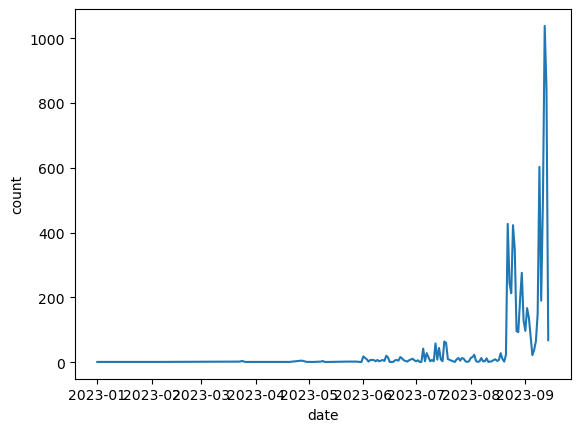

In [44]:
date_counts = df_trafico['date'].value_counts().reset_index()
date_counts.columns = ['date', 'count']
sns.lineplot(data=date_counts, x='date', y='count')
plt.show()

In [ ]:
#sns.pairplot(df_trafico[['sentiment', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount']])
#plt.show()

### Trafico en epoca de lluvia

Tomamos como epoca de lluvia desde mayo hasta el presente, y de enero a abril como no lluvia.

In [46]:
df_trafico['lluvia'] = df_trafico.month >= 5

En el grafico de abajo vemos como ha cambiado en sentimiento promedio respecto al trafico. En este caso decidimos verlo por mes para ver mas clara la diferencia. Vemos como baja significatimente cuando empieza la epoca de lluvia.

<Axes: xlabel='month', ylabel='sentiment'>

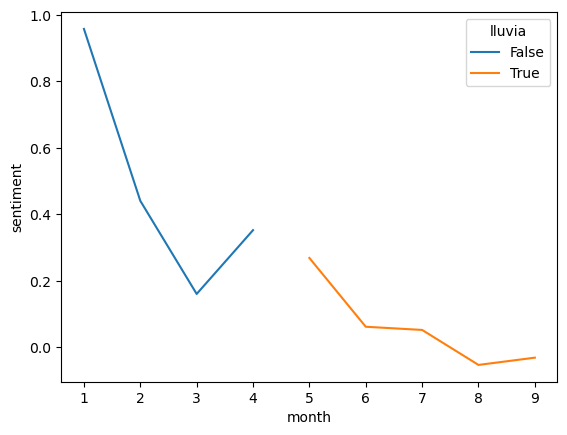

In [69]:
sns.lineplot(x='month', y='sentiment', hue='lluvia', errorbar=None, data=df_trafico)

### Socavón de zona 5

In [50]:
df_trafico['socavon'] = df_trafico.date >= '2023-08-13'

Una vez mas vemos que a partir de determinada fecha, en este caso el 13 de agosto, en promedio si ha bajado el sentimiento.

<Axes: xlabel='month', ylabel='sentiment'>

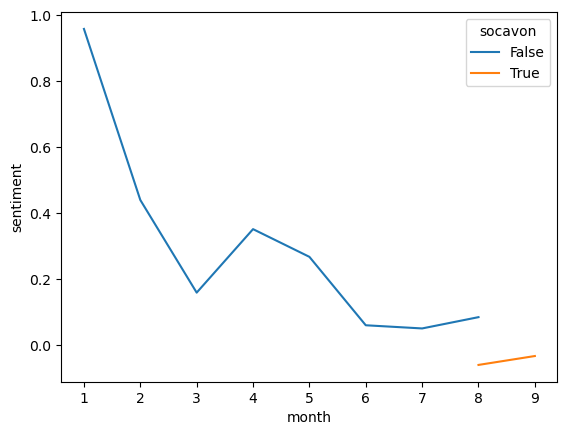

In [70]:
sns.lineplot(x='month', y='sentiment', hue='socavon', errorbar=None, data=df_trafico)

Extraemos los que hablen de la universidad, no hay forma de saber que se refieren exactamete a la del valle en algunos casos, pero como la localizacion en su mayoria son nulos, esta es la mejor alternativa.

In [61]:
df_trafico['u'] = df_trafico.clean_text.str.contains('|'.join(['vista hermosa', 'uvg', 'del valle', 'zona 15', 'zona 16', 'cayala', ' u ', 'vh']), case=False)

Vemos que desde que empiezan a aparecer estas palabras en la muestra, no vemos una diferencia clara en el sentimiento vs aquellos tweets que no estan relacionados a la universidad. Por lo que son igual de negativos que el resto.

<Axes: xlabel='date', ylabel='sentiment'>

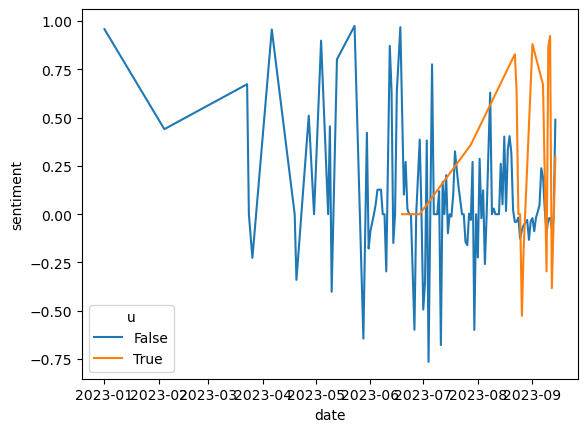

In [62]:
sns.lineplot(x='date', y='sentiment', hue='u', errorbar=None, data=df_trafico)

Si lo vemos por cantidad de veces que aparecen estas palabras, vemos claramente en agosto empiezan a aumnetar significativamente, por lo que si ha afctado la tendencia en las ultimas semanas.

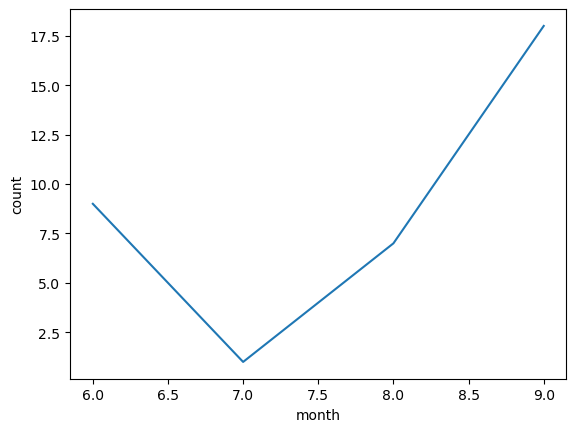

In [68]:
df_trafico_u = df_trafico[df_trafico.u]
date_counts = df_trafico_u['month'].value_counts().reset_index()
date_counts.columns = ['month', 'count']
sns.lineplot(data=date_counts, x='month', y='count')
plt.show()